In [1]:
import ROOT
import os
from my_utils import *
from fst import *
import numpy as np

import pasttrec_ctrl as ptc

#import phidrive
import micos_eco

data_dir = make_data_dir()



from ROOT import gInterpreter, gSystem
gInterpreter.ProcessLine('#include "/workdir/my_event.h"')




Welcome to JupyROOT 6.14/04


0

In [2]:
##################################################
##   clear data dir, copy root file or measure fresh    ##
##################################################

micos_eco.move(x=78.5,y=71)

## new data or existing data?

fresh = 1

if fresh:
  trigger_ufsd()
  #trigger_scinti()
  
  ptc.init_active_boards()
  ptc.set_threshold_for_board_by_name("0009",30)
  ptc.set_threshold_for_board_by_name("0014",30)

  #take_data(events=2000)
  take_data(time=20)

  clear_data_dir()
  os.system("cp /workdir/joint_tree.root {:s}/".format(data_dir))

(78.5, 71.0, 0.0)
done
init board 0009
set baselines of the following channels
[16, 17, 18, 19, 20, 21, 22, 23, 24]
to the following values
[1.0, 5.0, -1.0, 7.0, 5.0, 4.0, 3.0, 7.0, 6.0]
set baselines of the following channels
[24, 25, 26, 27, 28, 29, 30, 31]
to the following values
[6.0, -0.0, 1.0, 0.0, -4.0, 3.0, 2.0, 4.0]
init board 0014
set baselines of the following channels
[0, 1, 2, 3, 4, 5, 6, 7, 8]
to the following values
[3.0, 2.0, 7.0, 8.0, 2.0, 5.0, 3.0, 7.0, 9.0]
set baselines of the following channels
[8, 9, 10, 11, 12, 13, 14, 15]
to the following values
[9.0, 8.0, 3.0, 8.0, 5.0, 8.0, 4.0, 0.0]
GO4-*> Reading library: libGo4UserAnalysis  
GO4-*> Close of TUserSource  
GO4-*> Create default analysis with processor class TFirstStepProcessor  
GO4-*> Use class TStreamEvent as output event  
GO4-*> Welcome to Go4 Analysis Framework Release v5.9.0 (build 50900) !  
GO4-*> Analysis: Added analysis step Analysis  
GO4-*> Main: starting analysis in batch mode ...    
GO4-!> Fail

rm: cannot remove '*.root': No such file or directory
Info in <TUnixSystem::ACLiC>: creating shared library /workdir/./second_C.so


In [3]:
##################################################
##               slurp root file                ##
##################################################

#c = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",500,400)

f = ROOT.TFile("{:s}/joint_tree.root".format(data_dir))
tree = f.Get("joint_tree")

#c.Draw()

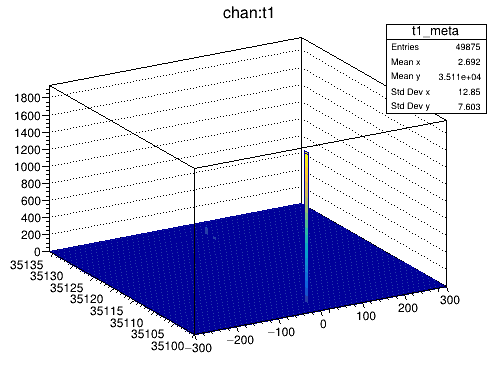

In [4]:
##################################################
##             overview TDC 0x0351              ##
##################################################


tdc=351
disp_channels = 36
tree.Draw("chan:t1>>t1_meta(1000,-300,300,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","lego2")
c.Draw()

Error in <TSelectorDraw::DrawSelect>: ncols*3 < ncomma ncols=1, ncomma=6


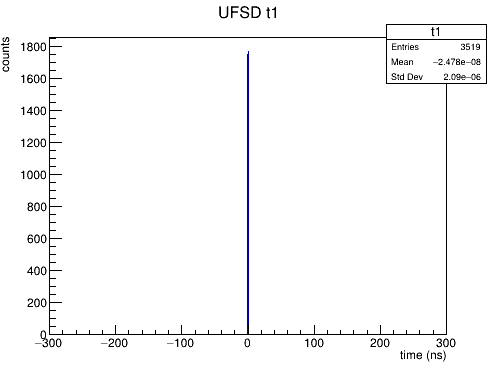

In [5]:
chan = 35103 
tree.Draw("t1>>t1(1000,-300,300,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"chan=={:d}".format(chan),"colz")
t1=f.Get("t1")
t1.SetTitle("UFSD t1")
t1.GetXaxis().SetTitle("time (ns)")
t1.GetYaxis().SetTitle("counts")
c.Draw()

 FCN=18.4865 FROM MIGRAD    STATUS=CONVERGED     131 CALLS         132 TOTAL
                     EDM=3.17499e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.06657e+02   1.09281e+01   1.83533e-02  -8.34676e-05
   2  Mean         3.16240e+01   2.82206e-02   6.07664e-05   1.29186e-02
   3  Sigma        3.51028e-01   2.26954e-02   2.02298e-05  -4.76766e-02


Error in <TSelectorDraw::DrawSelect>: ncols*3 < ncomma ncols=1, ncomma=6


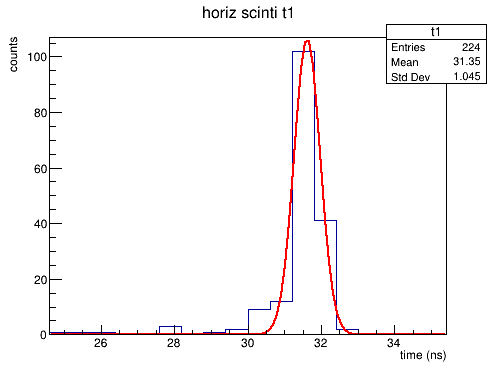

In [6]:
chan = 35131
tree.Draw("t1>>t1(1000,-300,300,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"chan=={:d}".format(chan),"colz")
t1=f.Get("t1")
t1.SetTitle("horiz scinti t1")
t1.GetXaxis().SetTitle("time (ns)")
t1.GetYaxis().SetTitle("counts")

t1.GetXaxis().SetRangeUser(25,35)
t1.Draw()
t1.Fit("gaus")
c.Draw()


c.Draw()

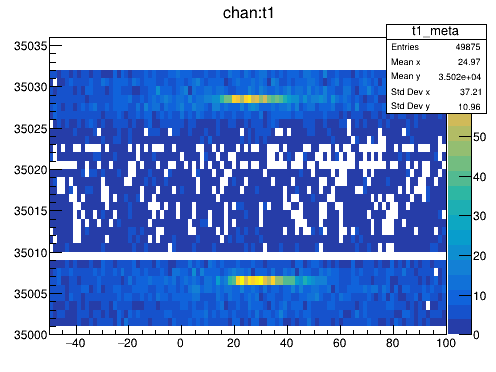

In [7]:
##################################################
##             overview TDC 0x0350              ##
##################################################


tdc=350
disp_channels = 36
tree.Draw("chan:t1>>t1_meta(100,-50,100,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","colz")
c.Draw()

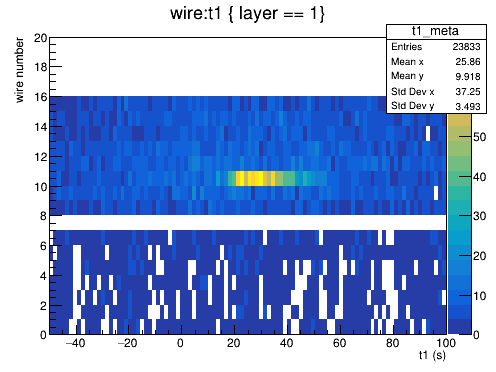

In [8]:
##################################################
##                   layer 1                    ##
##################################################

layer = 1
tree.Draw("wire:t1>>t1_meta(100,-50,100,{:d},{:d},{:d})".format(20,0,20)," layer == {:d}".format(layer),"colz")
t1_meta = f.Get("t1_meta")
#t1_meta.SetTitle("t1 meta")
t1_meta.GetXaxis().SetTitle("t1 (s)")
t1_meta.GetYaxis().SetTitle("wire number")
t1_meta.Draw("colz")
c.Draw()

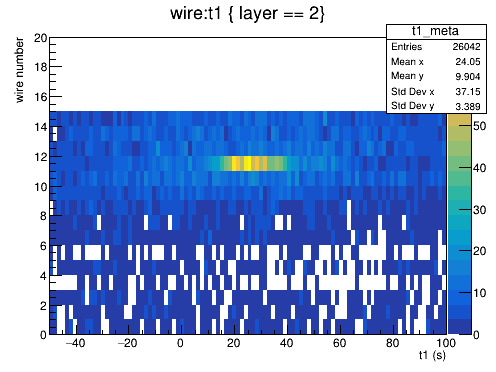

In [9]:
##################################################
##                   layer 2                    ##
##################################################

layer = 2
tree.Draw("wire:t1>>t1_meta(100,-50,100,{:d},{:d},{:d})".format(20,0,20)," layer == {:d}".format(layer),"colz")
t1_meta = f.Get("t1_meta")
#t1_meta.SetTitle("t1 meta")
t1_meta.GetXaxis().SetTitle("t1 (s)")
t1_meta.GetYaxis().SetTitle("wire number")
t1_meta.Draw("colz")
c.Draw()

 FCN=4565.93 FROM MIGRAD    STATUS=CONVERGED      90 CALLS          91 TOTAL
                     EDM=6.38619e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.26565e+01   2.92469e-01   7.16272e-03   1.05507e-04
   2  Mean         3.00345e+01   8.71304e-02   2.84364e-03  -8.31657e-04
   3  Sigma        1.19735e+01   1.09996e-01   4.25885e-05   6.62467e-01


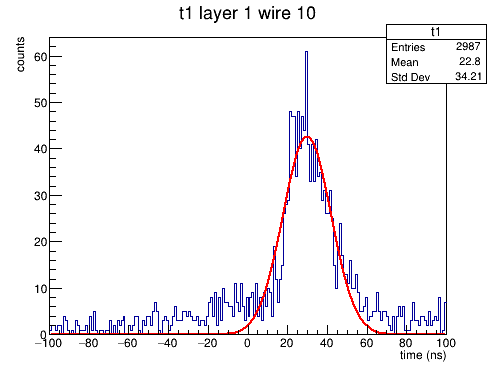

In [10]:
layer = 1
wire = 10

tree.Draw("t1>>t1(2000,-1000,1000)", "layer=={:d} && wire=={:d}".format(layer,wire),"colz")
t1=f.Get("t1")
t1.SetTitle("t1 layer {:d} wire {:d}".format(layer,wire))
t1.GetXaxis().SetTitle("time (ns)")
t1.GetYaxis().SetTitle("counts")

t1.GetXaxis().SetRangeUser(-100,100)
t1.Draw()
t1.Fit("gaus","WW")


c.Draw()

 FCN=4060.37 FROM MIGRAD    STATUS=CONVERGED      86 CALLS          87 TOTAL
                     EDM=2.7993e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.63662e+01   3.00971e-01   6.27274e-03  -2.78791e-04
   2  Mean         2.68043e+01   1.09524e-01   3.38683e-03   2.97431e-04
   3  Sigma        1.38856e+01   1.70624e-01   5.24649e-05  -4.08898e-02


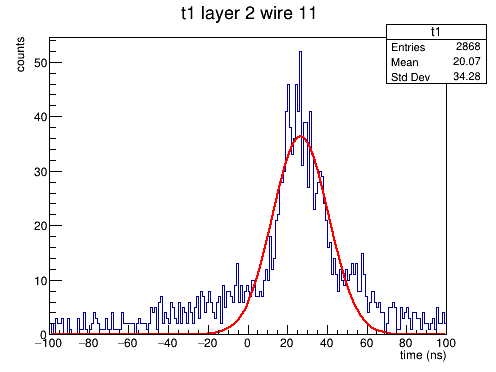

In [11]:
layer = 2
wire = 11

tree.Draw("t1>>t1(2000,-1000,1000)", "layer=={:d} && wire=={:d}".format(layer,wire),"colz")
t1=f.Get("t1")
t1.SetTitle("t1 layer {:d} wire {:d}".format(layer,wire))
t1.GetXaxis().SetTitle("time (ns)")
t1.GetYaxis().SetTitle("counts")

t1.GetXaxis().SetRangeUser(-100,100)
t1.Draw()
t1.Fit("gaus","WW")


c.Draw()

tree has 3519 entries


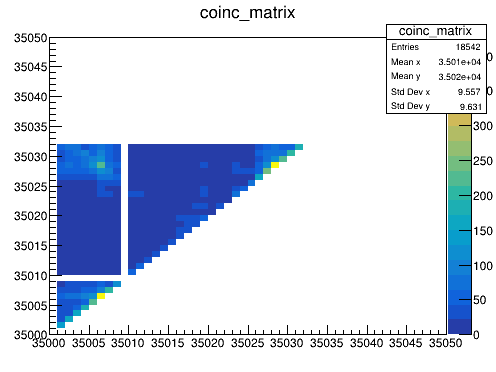

In [12]:
##################################################
##            read root tree example            ##
##################################################


t1_l = -30
t1_r = 100


## variables that will be filled from root tree:
last_evt = 0

entries = tree.GetEntries()
print("tree has {:d} entries".format(entries))

processed_tracks = 0

coinc_matrix = ROOT.TH2F("coinc_matrix","coinc_matrix", 500, 35000, 35000+500, 500, 35000, 35000+500)

w = 50
coinc_wires = ROOT.TH2F("coinc_wires","coinc_wires", w, 0, w, w, 0, w)

meta_fish = ROOT.TH2F("meta_fish","meta_fish", 500, -2500, 2500, 500, -250, 250);


entries_limit = 1000

#for i in range(0,entries):
for i in range(0,np.min([entries_limit,entries])):
  
  tree.GetEntry(i)
  this_event = tree.event
  hits = this_event.hits
  
  n_hits = hits.size()
    
  for hit_no_a in range(0,n_hits):
    hit_a = hits[hit_no_a]
    for hit_no_b in range(hit_no_a,n_hits):
      hit_b = hits[hit_no_b]
    
      if ( (hit_a.t1 > t1_l and hit_a.t1 < t1_r)  and  (hit_b.t1 > t1_l and hit_b.t1 < t1_r) ):
      
        coinc_matrix.Fill(hit_a.chan,hit_b.chan)    
          
        coinc_wires.Fill(hit_a.wire + (hit_a.layer-1)*20 ,hit_b.wire + (hit_b.layer-1)*20)      
      
        #if (   (hit_a.chan > 35000 and hit_a.chan < 35100) and  (hit_b.chan > 35000 and hit_a.chan < 35100)):
        #  meta_fish.Fill(hit_a.t1 + hit_b.t1, hit_a.t1 - hit_b.t1)


coinc_matrix.GetXaxis().SetRangeUser(35000,35050)
coinc_matrix.GetYaxis().SetRangeUser(35000,35050)
coinc_matrix.Draw("colz")

c.Draw()

    

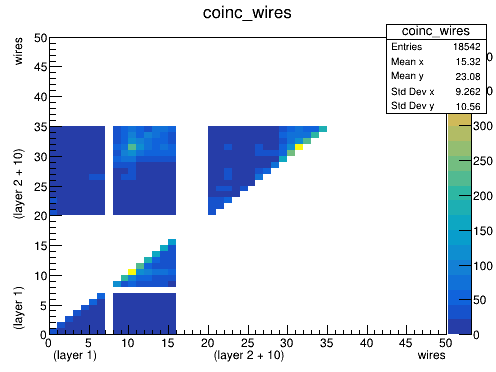

In [13]:

coinc_wires.Draw("colz")
coinc_wires.GetXaxis().SetTitle("(layer 1)" + " "*35 +  "(layer 2 + 10)" + " "*40 + "wires")
coinc_wires.GetYaxis().SetTitle("(layer 1)" + " "*20 +  "(layer 2 + 10)" + " "*25 + "wires")
c.Draw()

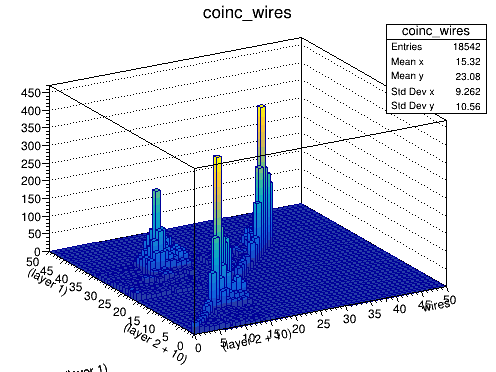

In [14]:

coinc_wires.Draw("lego2")
coinc_wires.GetXaxis().SetTitle("(layer 1)" + " "*35 +  "(layer 2 + 10)" + " "*40 + "wires")
coinc_wires.GetYaxis().SetTitle("(layer 1)" + " "*20 +  "(layer 2 + 10)" + " "*25 + "wires")
c.Draw()

In [15]:
# dont do the divergence scan

archive(label="ufsd_snap")

X = np.arange(79.65-7,79.65+7  +1,1)

outfile = ROOT.TFile("{:s}/outfile.root".format(data_dir),"RECREATE")

no_triggers = 1000

const_list = []
mean_list = []
sigma_list = []
entries_list = []

for x in X:
  micos_eco.move(x=x)
  take_data(events=no_triggers)
  c = ROOT.TCanvas("myCanvasName","The Canvas Title",500,400)
  f = ROOT.TFile("/workdir/joint_tree.root")
  os.system("cp /workdir/joint_tree.root {:s}/joint_tree_x{:3.3f}.root".format(data_dir,x))
  tree = f.Get("joint_tree")

  outfile.cd()
  layer = 2
  wire = 11
  
  tree.Draw("t1>>t1_x{:3.3f}(2000,-1000,1000)".format(x), "layer=={:d} && wire=={:d}".format(layer,wire),"colz")
  t1=outfile.Get("t1_x{:3.3f}".format(x))
  t1.SetTitle("t1 layer {:d} wire {:d}".format(layer,wire))
  t1.GetXaxis().SetTitle("time (ns)")
  t1.GetYaxis().SetTitle("counts")
  
  t1.GetXaxis().SetRangeUser(-100,100)
  t1.Draw()
  t1.Fit("gaus","WW")

  fit = t1.GetFunction("gaus");
  const_list   += [fit.GetParameter(0)]
  mean_list    += [fit.GetParameter(1)]
  sigma_list   += [fit.GetParameter(2)]
  entries_list += [t1.Integral(t1.FindBin(-100),t1.FindBin(100))]
  t1.Write()
  print("const_list")
  print(const_list)
  print("mean_list")
  print(mean_list)
  print("sigma_list")
  print(sigma_list)
  print("entries_list")
  print(entries_list)
  
  

outfile.Write()
outfile.Close()

#ufsd rate negligible in spill breaks

from matplotlib import pyplot as plt

plt.plot(X,entries_list,label="hist entries")
plt.ylim(0,np.max(entries_list))
plt.legend()
plt.show()

plt.plot(X,mean_list,label="fit mean (t1)")
plt.ylim(0,np.max(mean_list))
plt.legend()
plt.show()

plt.plot(X,const_list,label="fit const (t1)")
plt.ylim(0,np.max(const_list))
plt.legend()
plt.show()

plt.plot(X,sigma_list,label="fit sigma (t1)")
plt.ylim(0,np.max(sigma_list))
#plt.ylim(0,20)
plt.legend()
plt.show()

area_list = np.array(const_list) * np.array(sigma_list)

plt.plot(X,area_list,label="gaus area")
plt.ylim(0,np.max(area_list))
plt.legend()
plt.show()